# Simple Approach to Multi-Label Classification

## 1. EDA

In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
printmd("**Sample data:**")
data_raw.head()

Number of rows in data = 159571
Number of columns in data = 8




**Sample data:**

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


### 1.1. Checking for missing values

In [8]:
missing_values_check = data_raw.isnull().sum()
print(missing_values_check)

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64


### 1.2. Calculating number of comments under each label

In [9]:
# Comments with no label are considered to be clean comments.
# Creating seperate column in dataframe to identify clean comments.

# We use axis=1 to count row-wise and axis=0 to count column wise

rowSums = data_raw.iloc[:,2:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of comments = ",len(data_raw))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(data_raw)-clean_comments_count))

Total number of comments =  159571
Number of clean comments =  143346
Number of comments with labels = 16225


In [10]:
categories = list(data_raw.columns.values)
categories = categories[2:]
print(categories)

['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']


In [11]:
# Calculating number of comments in each category

counts = []
for category in categories:
    counts.append((category, data_raw[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,malignant,15294
1,highly_malignant,1595
2,rude,8449
3,threat,478
4,abuse,7877
5,loathe,1405


C:\Users\91890\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


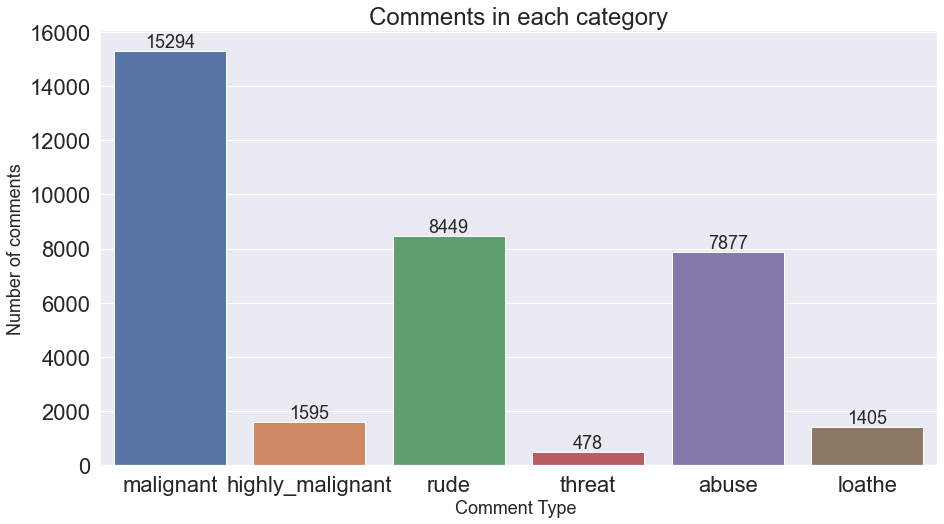

In [12]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(categories, data_raw.iloc[:,2:].sum().values)

plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = data_raw.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

### 1.3. Calculating number of comments having multiple labels

C:\Users\91890\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


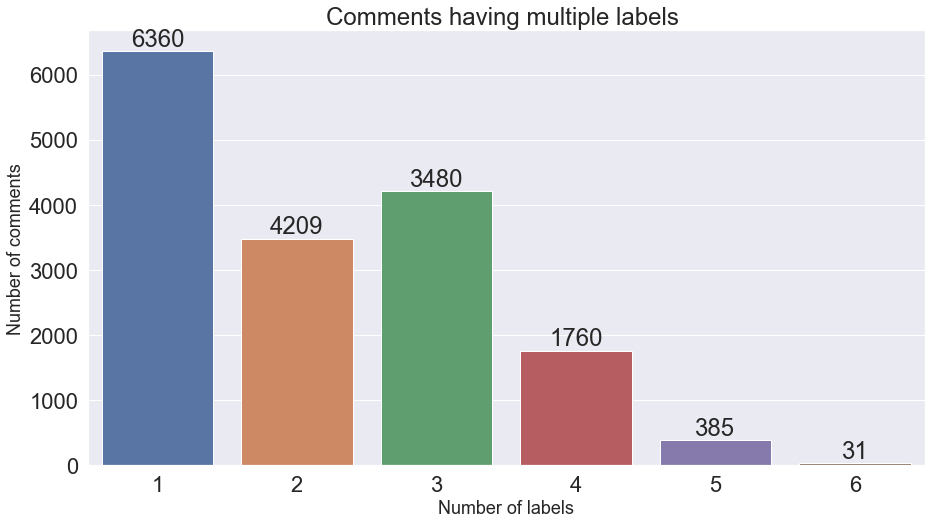

In [13]:
rowSums = data_raw.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

### 1.4. WordCloud representation of most used words in each category of comments

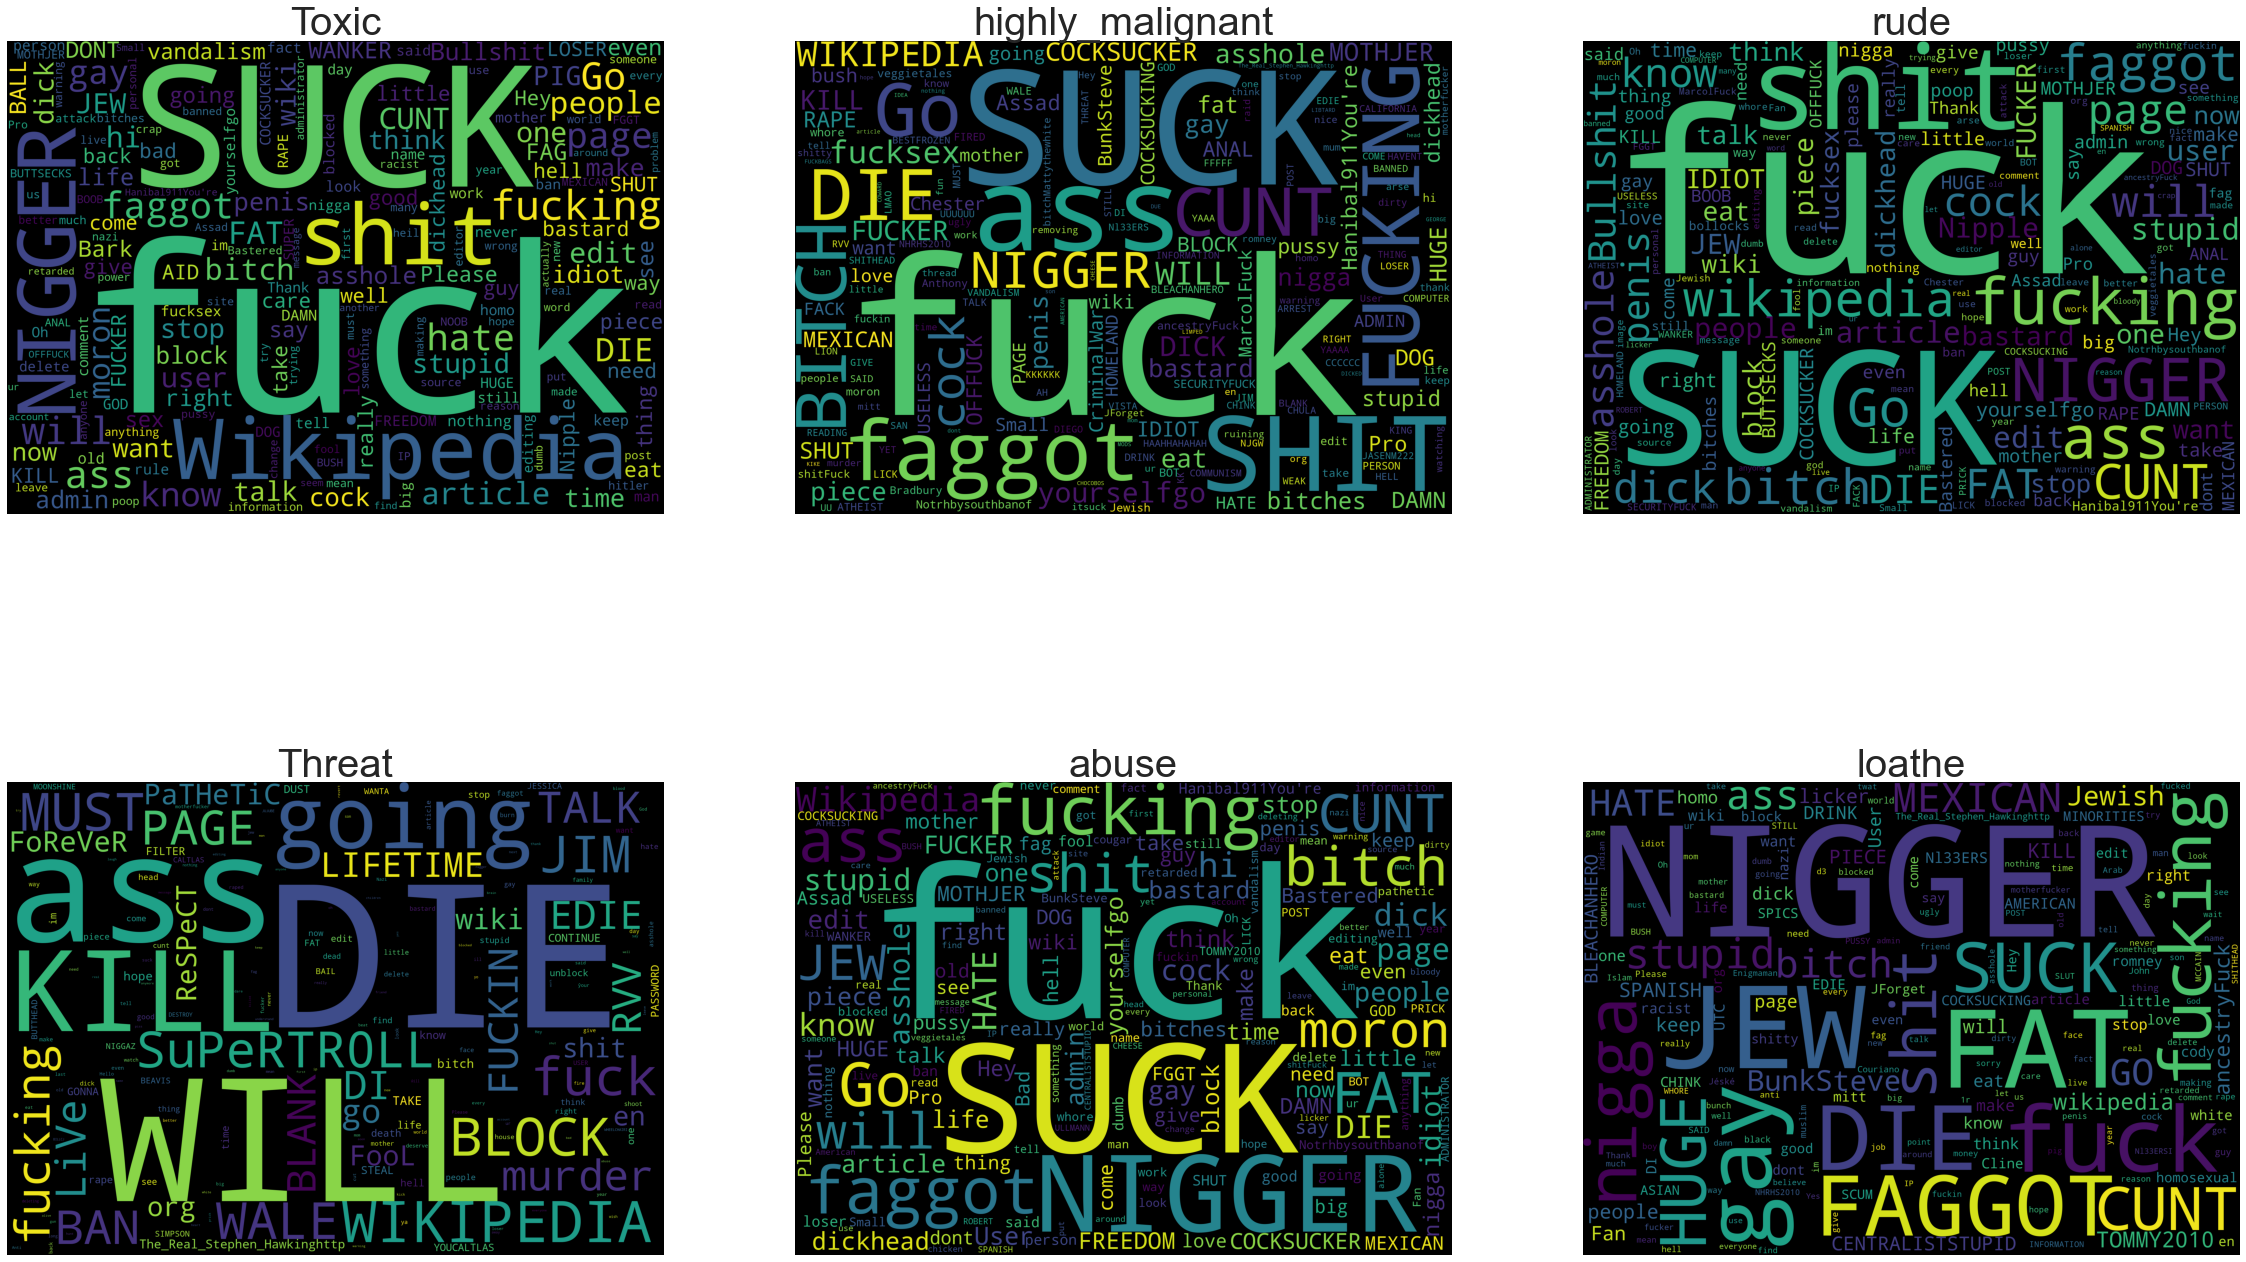

In [36]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

# malignant
subset = data_raw[data_raw.malignant==1]
text = subset.comment_text.values
cloud_malignant = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Toxic",fontsize=40)
plt.imshow(cloud_malignant)


# cloud_highly_malignant
subset =data_raw[data_raw.highly_malignant==1]
text = subset.comment_text.values
cloud_highly_malignant = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("highly_malignant",fontsize=40)
plt.imshow(cloud_highly_malignant)


# rude
subset = data_raw[data_raw.rude==1]
text = subset.comment_text.values
cloud_rude = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("rude",fontsize=40)
plt.imshow(cloud_rude)


# threat
subset = data_raw[data_raw.threat==1]
text = subset.comment_text.values
cloud_threat = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("Threat",fontsize=40)
plt.imshow(cloud_threat)


# abuse
subset = data_raw[data_raw.abuse==1]
text = subset.comment_text.values
cloud_abuse = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("abuse",fontsize=40)
plt.imshow(cloud_abuse)


# loathe
subset = data_raw[data_raw.loathe==1]
text = subset.comment_text.values
cloud_loathe = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 6)
plt.axis('off')
plt.title("loathe",fontsize=40)
plt.imshow(cloud_loathe)

plt.show()

## 2. Data Pre-Processing

In [16]:
from wordcloud import WordCloud,STOPWORDS
data = data_raw
data = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
data.shape

(2000, 8)

In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

### 2.1. Cleaning Data

In [18]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [19]:
data['comment_text'] = data['comment_text'].str.lower()
data['comment_text'] = data['comment_text'].apply(cleanHtml)
data['comment_text'] = data['comment_text'].apply(cleanPunc)
data['comment_text'] = data['comment_text'].apply(keepAlpha)
data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
118085,76d0365ea1368010,category neo creationism ive just been attempt...,0,0,0,0,0,0
54288,9109feacde8c601f,jawohl mein f hrer yeah like your an expert yo...,0,0,0,0,0,0
29757,4efa344ed401b680,a easy answer go to the user talk page create...,0,0,0,0,0,0
133265,c8fab0122a72d2d2,i did not neglect to mention reliable sourcing...,0,0,0,0,0,0
27515,48d08f444a3c84f8,also removed the current line up for reasons d...,0,0,0,0,0,0


### 2.2. Removing Stop Words

In [20]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['comment_text'] = data['comment_text'].apply(removeStopWords)
data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
118085,76d0365ea1368010,category neo creationism ive attempting cle...,0,0,0,0,0,0
54288,9109feacde8c601f,jawohl mein f hrer yeah like expert youre o...,0,0,0,0,0,0
29757,4efa344ed401b680,easy answer go user talk page create new ...,0,0,0,0,0,0
133265,c8fab0122a72d2d2,neglect mention reliable sourcing deleted...,0,0,0,0,0,0
27515,48d08f444a3c84f8,removed current line reasons discussed e...,0,0,0,0,0,0


### 2.3. Stemming

In [21]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['comment_text'] = data['comment_text'].apply(stemming)
data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
118085,76d0365ea1368010,categori neo creation ive attempt cleanup cate...,0,0,0,0,0,0
54288,9109feacde8c601f,jawohl mein f hrer yeah like expert your opini...,0,0,0,0,0,0
29757,4efa344ed401b680,easi answer go user talk page creat new sectio...,0,0,0,0,0,0
133265,c8fab0122a72d2d2,neglect mention reliabl sourc delet refer talk...,0,0,0,0,0,0
27515,48d08f444a3c84f8,remov current line reason discuss editor secti...,0,0,0,0,0,0


### 2.4. Train-Test Split

In [22]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(1400, 8)
(600, 8)


In [23]:
train_text = train['comment_text']
test_text = test['comment_text']

### 2.5. TF-IDF

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(ngram_range=(1, 3), strip_accents='unicode')

In [25]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['id','comment_text'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['id','comment_text'], axis=1)

## 3. Multi-Label Classification

### 3.1. Multiple Binary Classifications - (One Vs Rest Classifier)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [27]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in categories:
    printmd('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction1 = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction1)))
    print("\n")

**Processing malignant comments...**

Test accuracy is 0.9283333333333333




**Processing highly_malignant comments...**

Test accuracy is 0.9916666666666667




**Processing rude comments...**

Test accuracy is 0.9583333333333334




**Processing threat comments...**

Test accuracy is 0.9933333333333333




**Processing abuse comments...**

Test accuracy is 0.96




**Processing loathe comments...**

Test accuracy is 0.99


Wall time: 4.75 s


### 3.2. Multiple Binary Classifications - (Binary Relevance)

In [40]:
%%time

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict
predictions2 = classifier.predict(x_test)

# accuracy
print("Accuracy Binary Relevance= ",accuracy_score(y_test,predictions2))
print("\n")

Accuracy Binary Relevance=  0.8983333333333333


Wall time: 11.1 s


### 3.3. Classifier Chains

In [29]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

In [41]:
%%time

# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())

# Training logistic regression model on train data
classifier.fit(x_train, y_train)

# predict
predictions3 = classifier.predict(x_test)

# accuracy
print("Accuracy Classifier Chains= ",accuracy_score(y_test,predictions3))
print("\n")

Accuracy Classifier Chains=  0.9216666666666666


Wall time: 16.2 s


### 3.4. Label Powerset

In [31]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset

In [42]:
%%time

# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())

# train
classifier.fit(x_train, y_train)

# predict
predictions4 = classifier.predict(x_test)

# accuracy
print("Accuracy of Label Powerset= ",accuracy_score(y_test,predictions4))
print("\n")

Accuracy of Label Powerset=  0.9216666666666666


Wall time: 10.7 s


### 3.5. Adapted Algorithm

In [33]:
# http://scikit.ml/api/api/skmultilearn.adapt.html#skmultilearn.adapt.MLkNN

from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix

In [43]:
%%time

classifier_new = MLkNN(k=10)

# Note that this classifier can throw up errors when handling sparse matrices.

x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()

# train
classifier_new.fit(x_train, y_train)

# predict
predictions_new5 = classifier_new.predict(x_test)

# accuracy
print("Accuracy of Adapted Algorithm= ",accuracy_score(y_test,predictions_new5))
print("\n")

Accuracy of Adapted Algorithm=  0.9166666666666666


Wall time: 3.61 s


In [45]:
classifier=BinaryRelevance(GaussianNB())
classifier.fit(x_train,y_train)

BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])

In [48]:
#saving LogisticRegression model
BinaryRelevance_model=BinaryRelevance(GaussianNB())
BinaryRelevance_model.fit(x_train,y_train)


#Library for saving data
import pickle
filename='finalized_model.pickle'
pickle.dump(BinaryRelevance_model,open(filename,'wb'))

# Prediction using test data

In [50]:
df=pd.read_csv('test.csv')

#show all columns in dataframe
pd.set_option('display.max_columns', None)

df.head(5)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [51]:
#Checking null values
df.isnull().sum()

id              0
comment_text    0
dtype: int64

In [52]:
#dropping id as its unique
df.drop(columns=["id"],inplace=True)
df

,comment_text
0,Yo bitch Ja Rule is more succesful then you'll...
1,== From RfC == \n\n The title is fine as it is...
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,":If you have a look back at the source, the in..."
4,I don't anonymously edit articles at all.
...,...
153159,". \n i totally agree, this stuff is nothing bu..."
153160,== Throw from out field to home plate. == \n\n...
153161,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,""" \n\n == """"One of the founding nations of the..."


In [55]:
from wordcloud import WordCloud,STOPWORDS
data = df
data = df.loc[np.random.choice(df.index, size=2000)]


import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

data['comment_text'] = data['comment_text'].str.lower()
data['comment_text'] = data['comment_text'].apply(cleanHtml)
data['comment_text'] = data['comment_text'].apply(cleanPunc)
data['comment_text'] = data['comment_text'].apply(keepAlpha)
data.head()

stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['comment_text'] = data['comment_text'].apply(removeStopWords)


stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['comment_text'] = data['comment_text'].apply(stemming)

In [57]:
data

,comment_text
101287,date use http www uspapermoney info sign regis...
14038,composit wrote composit section retard dare you
68477,around world isnt promot case fact london phil...
90286,fair use rational imag rockmanrealoper jpg tha...
42780,subhan chauhan live malerkotla punjab india
...,...
23363,wikiproject scout sao kind leav note thank inv...
73464,problem new work correct right bwf id work cha...
129316,sockpuppet wikipedia suspect sock puppet gdewild
112505,dyk reject come man fair


In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(data)

TfidfVectorizer(ngram_range=(1, 3), strip_accents='unicode')

In [67]:
data

,comment_text
101287,date use http www uspapermoney info sign regis...
14038,composit wrote composit section retard dare you
68477,around world isnt promot case fact london phil...
90286,fair use rational imag rockmanrealoper jpg tha...
42780,subhan chauhan live malerkotla punjab india
...,...
23363,wikiproject scout sao kind leav note thank inv...
73464,problem new work correct right bwf id work cha...
129316,sockpuppet wikipedia suspect sock puppet gdewild
112505,dyk reject come man fair
